In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sys
import os

import peakutils
import pandas as pd

sys.path.insert(0, '../../..')

from voltammetry import core





../../../data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt Opened
1
2


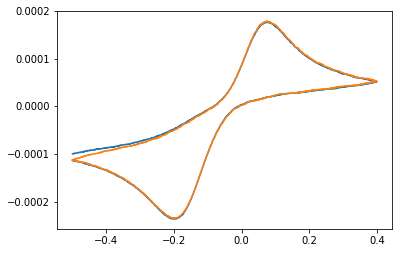

In [17]:


dict_1,n_cycle = core.read_file('../../../data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt')
for i in range(n_cycle):
        print(i+1)
        df = core.data_frame(dict_1, i+1)
        plt.plot(df.Potential, df.Current, label = "Cycle{}".format(i+1))


In [18]:
# Over all wrapping function.
# This i is in range of number of cycles. 

for i in range(n_cycle-1):
    i = i+1
    df = core.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
    # Peaks are here [list]
    peak_index = core.peak_detection_fxn(y)
    peak_top = peakutils.indexes(mod_col_y2, thres=0.99, min_dist=20)
    peak_bottom = peakutils.indexes(abs(mod_col_y1), thres=0.99, min_dist=20)
    # Split x,y to get baselines
    x1,x2 = core.split(x)
    y1,y2 = core.split(y)
    y_base1 = core.linear_background(x1,y1)
    y_base2 = core.linear_background(x2,y2)
    # Calculations based on baseline and peak
    values = core.peak_values(x,y)
    Et = values[0]
    Eb = values[2]
    dE = core.del_potential(x,y)
    half_E = min(Et,Eb) + core.half_wave_potential(x,y)
    ia = core.peak_heights(x,y)[0]
    ic = core.peak_heights(x,y)[1]
    ratio_i = core.peak_ratio(x,y)
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.title('Cyclic Voltammetry')
plt.xlabel('Potential (mV)')
plt.ylabel('Current (A)')
plt.plot(x1[peak_index[1]],y1[peak_index[1]],marker='o')
plt.plot(x2[peak_index[0]],y2[peak_index[0]],marker='o',color = 'red')
plt.plot(x1, y_base1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_base2, color = "orangered", linestyle=':',linewidth=2) 
rcParams.update({'figure.autolayout': True})
#plt.savefig('lala',dpi=1000)
f'For this data set : Epc= {Eb} ,Epa = {Et},Ipc= {ic}, Ipa= {ia}, ∆E = {dE}, Ipc/Ipa = {ratio_i}'
plt.show
#print([dE, half_E , ia, ic, ratio_i ])


TypeError: slice indices must be integers or None or have an __index__ method

In [22]:
peak_top = peakutils.indexes(y, thres=0.99, min_dist=20)
peak_bottom = peakutils.indexes(abs(y), thres=0.99, min_dist=20)

In [24]:
y

0      -0.000100
1      -0.000100
2      -0.000100
3      -0.000100
4      -0.000099
5      -0.000099
6      -0.000099
7      -0.000100
8      -0.000099
9      -0.000100
10     -0.000099
11     -0.000099
12     -0.000099
13     -0.000099
14     -0.000099
15     -0.000099
16     -0.000099
17     -0.000098
18     -0.000099
19     -0.000099
20     -0.000098
21     -0.000098
22     -0.000098
23     -0.000098
24     -0.000098
25     -0.000098
26     -0.000098
27     -0.000098
28     -0.000098
29     -0.000098
          ...   
3571   -0.000116
3572   -0.000116
3573   -0.000116
3574   -0.000116
3575   -0.000116
3576   -0.000116
3577   -0.000115
3578   -0.000115
3579   -0.000116
3580   -0.000115
3581   -0.000115
3582   -0.000115
3583   -0.000115
3584   -0.000115
3585   -0.000115
3586   -0.000115
3587   -0.000115
3588   -0.000115
3589   -0.000115
3590   -0.000114
3591   -0.000115
3592   -0.000115
3593   -0.000115
3594   -0.000114
3595   -0.000114
3596   -0.000114
3597   -0.000114
3598   -0.0001